# Question 2 - Analysis 2

In [1]:
import os
import glob
import json
path = os.getcwd()
path_json = os.path.join(path,'Crime')
json_files = [j for j in os.listdir(path_json) if j.endswith('.json')]

In [50]:
import glob
import re
files = "*.json"
words = ['crime','justice','police']
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
crimedict = {}
for j in glob.glob(os.path.join(path_json,files)):
            loaded_file = json.loads(open(j).read())
            response = loaded_file['response']
            docs = response['docs']
            for files in docs:
                section_name = files['section_name']
                lead_paragraph = files['lead_paragraph']
                #print(lead_paragraph)
                if lead_paragraph != None:
                    token = tokenizer.tokenize(lead_paragraph)
                    #print(token)
                    for t in token:
                        if 'crime' or 'justice' or 'police' in t:
                            if section_name not in crimedict:
                                crimedict[section_name] = 1
                            else:
                                crimedict[section_name] +=1
#print(crimedict)
from collections import Counter 
#count = Counter(crimedict)
#final_count = count.most_common()
#print(final_count)

In [78]:
import matplotlib.pyplot as plt
import csv
file_csv = open('C:/Users/hp/Desktop/2nd Sem Northeastern University/Data Analysis Using Python/Midterm Assignment/Question2_Analysis2/Crimes.csv','w',newline = "", encoding = 'utf-8', errors = 'ignore')
write_csv = csv.writer(file_csv)
write_csv.writerow(['Sections Names','Count'])
count = Counter(crimedict)
final_count = count.most_common(10)
#print(final_count)
for i in range (0,len(final_count)):
    for b in final_count:
        #print(b[0])
        write_csv.writerow([b[0],b[1]])

In [79]:
column1 = []
column2 = []
with open('C:/Users/hp/Desktop/2nd Sem Northeastern University/Data Analysis Using Python/Midterm Assignment/Question2_Analysis2/Crimes.csv','r') as f:
    r1 = csv.reader(f)
    for row in r1:
        sections = row[0]
        count = row[1]
        if sections not in column1:
            if sections != 'Sections Names' and sections != 'Briefing':
                column1.append(sections)
                #print(sections)
        if count not in column2:
            if count != 'Count':
                column2.append(count)
        #column2.append(count)
print(column1)
print(column2)
x = [1,2,3,4,5,6,7,8,9,10]
y = [3126, 2912, 537, 529, 450, 439, 241, 180, 140, 124]

['World', 'U.S.', 'N.Y. / Region', 'Business Day', 'Arts', 'Opinion', 'Sports', 'Books', 'Movies', 'Magazine']
['3126', '2912', '537', '529', '450', '439', '241', '180', '140', '124']


In [88]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(x,
    #using df['pre_score'] data,
    y)
#     # of width
#     width = 0.25,
#     # with alpha 0.5
#     alpha=0.5)
#     # with color
#     color='#54c1b7')
#     # with label the first value in first_name
#     label='World')

<Container object of 10 artists>

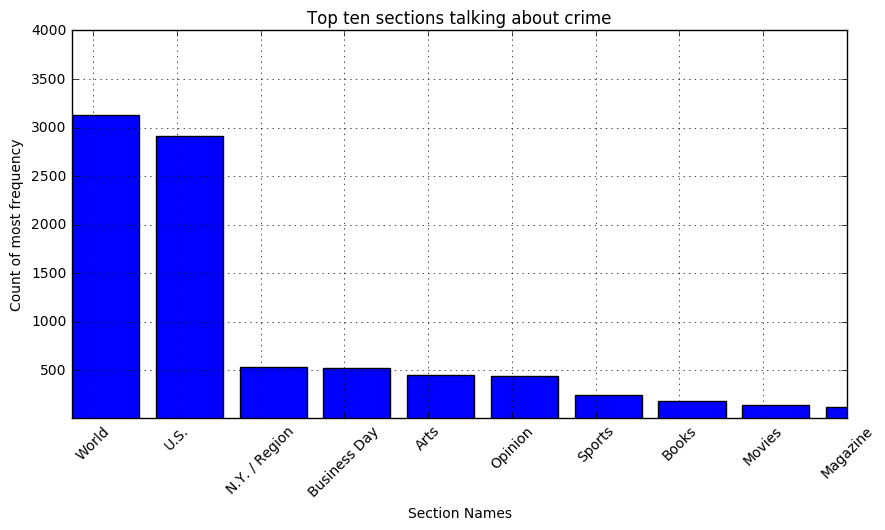

In [89]:
# Set the y axis label
ax.set_ylabel('Count of most frequency')
# Set the x axis label
ax.set_xlabel('Section Names')

#Setting the x-axis and y-axis limits
plt.xlim(1,10)
plt.ylim(10,4000)

# Set the chart's title
ax.set_title('Top ten sections talking about crime')
xTickMarks = ['World', 'U.S.', 'N.Y. / Region', 'Business Day', 'Arts', 'Opinion', 'Sports', 'Books', 'Movies', 'Magazine']
width = 0.25
ax.set_xticks([p+width for p in x])
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)

plt.grid()
plt.show()